In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib notebook

In [2]:
# 100Hz 51 Woman extracted from 03:15:00 to 03:45:00 C3-A1 52 115 
eeg = pd.read_csv(os.path.join('data','eeg.txt'))
eeg[0:10].T # Show the first 10 data points

,0,1,2,3,4,5,6,7,8,9
C3A1,-0.9562,-0.8962,-3.1877,-4.1783,-5.319,-6.1896,-7.8006,-6.9701,-0.7061,2.3058


In [3]:
# Get one signal vector and set the time vector.
x = eeg['C3A1']
fs = 100
N = len(x)
t = np.arange(N)/fs
x.index = t

print("That signal: %dHz, %d samples, %d secs" % (fs,  N,  np.round(t[-1])))

That signal: 100Hz, 180000 samples, 1800 secs


<IPython.core.display.Javascript object>


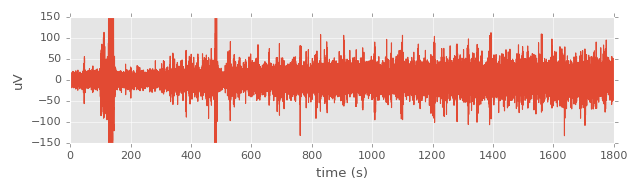

In [4]:
def ploteeg(t,x):
    plt.figure(figsize=0.5*plt.figaspect(0.3))
    plt.plot(t,x)
    plt.xlabel('time (s)')
    plt.ylabel('uV')
    plt.ylim(-150,150)
    plt.tight_layout()
    
ploteeg(t,x)

<IPython.core.display.Javascript object>


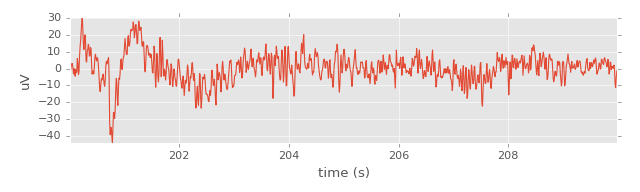

<IPython.core.display.Javascript object>


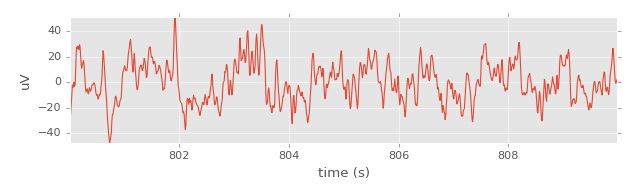

(800.00999999999999,
 809.99000000000001,
 -47.345799999999997,
 51.036900000000003)

In [5]:
# Plot a few seconds snippet of the same signal
snip = (t>200) & (t<210)
ploteeg(t[snip], x[snip])
plt.axis('tight')

snip = (t>800) & (t<810)
ploteeg(t[snip], x[snip])
plt.axis('tight')


In [6]:
Nw = 100 # Number of wanted windows
w = np.reshape(x, (Nw, -1))
Nt = w.shape[1]
tw = t[:Nt]

<IPython.core.display.Javascript object>


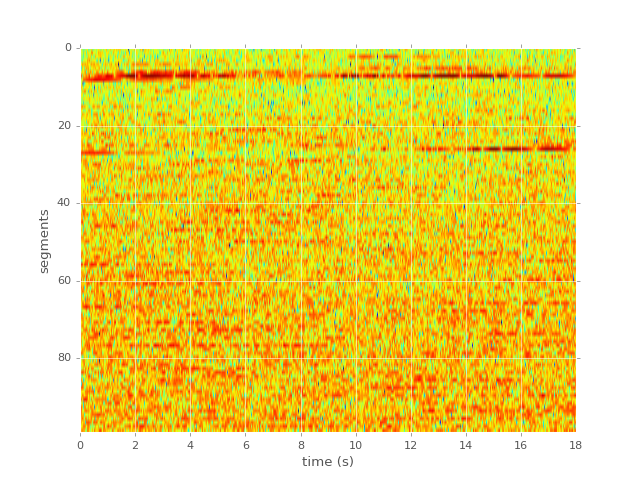

In [7]:
plt.figure()
plt.imshow(np.log(w*w), extent=(tw[0],tw[-1],Nw-1,0))
plt.axis('tight')
plt.xlabel('time (s)')
plt.ylabel('segments')

In [8]:
W = np.fft.fft(w) # By default, applied on last axe (axes=-1)
W = np.fft.fftshift(W, axes=-1) # By default, applied on ALL axes
f = np.fft.fftfreq(Nt, 1/fs)
f = np.fft.fftshift(f, axes=-1)

In [9]:
# Ah, I just did a non-windowed spectrogram. I will skip negative
# frequencies and transpose it to have a freq x time representation.
i = (f >= 0)
W = W[:,i].T
f = f[i]

<IPython.core.display.Javascript object>


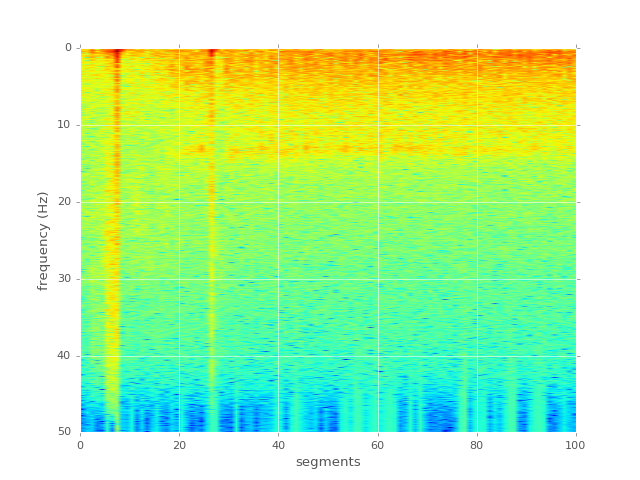

In [10]:
plt.figure()
plt.imshow(np.log(np.abs(W)), extent=(0, Nw, f[-1], f[0]))
plt.axis('tight')
plt.xlabel('segments')
plt.ylabel('frequency (Hz)')